<a href="https://colab.research.google.com/github/Asfia-Fathima/Statistical-Analytics-computing/blob/main/lab_10_(09_06_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This includes--

 23--Data Wrangling in python.


 24--Data Aggregation and Group Operations in
 Pandas

 25-- Perform statistical analysis and visualize:
  ~Mean, median, standard deviation
  ~Histogram and box plot of the data



In [3]:
#data Wrangling
import pandas as pd
# DataFrames
df1 = pd.DataFrame({'Emp_ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'Emp_ID': [1, 2, 4], 'Salary': [50000, 60000, 70000]})
print("Original DF1",df1)
print("Original DF2",df2)


Original DF1    Emp_ID     Name
0       1    Alice
1       2      Bob
2       3  Charlie
Original DF2    Emp_ID  Salary
0       1   50000
1       2   60000
2       4   70000


In [4]:
# INNER JOIN
result = pd.merge(df1, df2, on='Emp_ID', how='inner')
print("Inner Join:\n", result)


Inner Join:
    Emp_ID   Name  Salary
0       1  Alice   50000
1       2    Bob   60000


In [5]:
# LEFT JOIN
left_result = pd.merge(df1, df2, on='Emp_ID', how='left')
print("Left Join:\n", left_result)


Left Join:
    Emp_ID     Name   Salary
0       1    Alice  50000.0
1       2      Bob  60000.0
2       3  Charlie      NaN


In [6]:
#Right Join
result_right = pd.merge(df1, df2, on='Emp_ID', how='right')
print(result_right)


   Emp_ID   Name  Salary
0       1  Alice   50000
1       2    Bob   60000
2       4    NaN   70000


In [7]:
#Full Join
full_join = pd.merge(df1, df2, on='Emp_ID', how='outer')
print(full_join)


   Emp_ID     Name   Salary
0       1    Alice  50000.0
1       2      Bob  60000.0
2       3  Charlie      NaN
3       4      NaN  70000.0


In [9]:
#COMBINE:-ROW WISE
import pandas as pd
df1 = pd.DataFrame({
    'ID': [1, 2],
    'Name': ['Alice', 'Bob']
})
df2 = pd.DataFrame({
    'ID': ['apple', 'boy'],
    'Name': ['Charlie', 'David']})
combined_rows = pd.concat([df1, df2], axis=0)
print(combined_rows)


      ID     Name
0      1    Alice
1      2      Bob
0  apple  Charlie
1    boy    David


In [10]:

#COMBINE:-COLUMN WISE(add a new column)
df3 = pd.DataFrame({
    'Age': [25, 30]
})
combined_cols = pd.concat([df1, df3], axis=1)
print(combined_cols)


   ID   Name  Age
0   1  Alice   25
1   2    Bob   30


In [13]:
#Pivot .
# Pivot
data = pd.DataFrame({
    'Month': ['Jan', 'Jan', 'Feb', 'Feb'],
    'Product': ['A', 'B', 'A', 'B'],
    'Sales': [100, 200, 150, 250]
})
pivoted = data.pivot(index='Month', columns='Product', values='Sales')
print("pivoted=\n",pivoted)



pivoted=
 Product    A    B
Month            
Feb      150  250
Jan      100  200


In [14]:
# Melt
wide_df = pd.DataFrame({
    'Month': ['Jan', 'Feb'],
    'A': [100, 150],
    'B': [200, 250]
})


melted = pd.melt(wide_df, id_vars='Month', var_name='Product', value_name='Sales')


print("\nMelted=\n",melted)



Melted=
   Month Product  Sales
0   Jan       A    100
1   Feb       A    150
2   Jan       B    200
3   Feb       B    250


In [15]:
#Hierarchical Indexing;
import pandas as pd
index = pd.MultiIndex.from_tuples([('USA', 'NY'), ('USA', 'CA'), ('India', 'Delhi')], names=['Country', 'City'])
df = pd.DataFrame({'Population': [8.6, 39.5, 18.9]}, index=index)
print(df)

               Population
Country City             
USA     NY            8.6
        CA           39.5
India   Delhi        18.9


In [17]:
#24. Data Aggregation and Group Operations in Pandas
import pandas as pd
# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Department': ['Sales', 'HR', 'IT', 'Sales'],
    'Salary': [50000, 60000, 55000, 52000],
    'Bonus': [5000, 6000, 4500, 5200]}
df = pd.DataFrame(data)
 # Define a function to map department to category
def map_department_to_category(dept):
    if dept == 'Sales':
        return 'Business'
    elif dept == 'HR':
        return 'Support'
    elif dept == 'IT':
        return 'Technical'
    else:
        return 'Other'
# Grouping by applying function
grouped_by_function = df.groupby(df['Department'].map(map_department_to_category)).sum()
print("Grouping by Function:\n", grouped_by_function)


Grouping by Function:
                   Name  Department  Salary  Bonus
Department                                       
Business    AliceDavid  SalesSales  102000  10200
Support            Bob          HR   60000   6000
Technical      Charlie          IT   55000   4500


In [18]:
#Group Operations in Pandas

import pandas as pd
data = {
    'Department': ['Sales', 'Sales', 'HR', 'HR', 'IT', 'IT', 'Sales', 'IT'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hank'],
    'Salary': [50000, 60000, 45000, 47000, 70000, 72000, 52000, 73000],
    'Bonus': [5000, 6000, 4500, 4700, 7000, 7200, 5200, 7300]
}

df = pd.DataFrame(data)
print("Original Data frame\n",df)

# cummin(), cummax(), cumsum(), cumprod()
df.groupby('Department')['Salary'].cummin()
df.groupby('Department')['Bonus'].cumsum()

#first(), last()
df.groupby('Department').first()
df.groupby('Department').last()

#mean(), median()
df.groupby('Department')['Salary'].mean()
df.groupby('Department')['Bonus'].median()

#min(), max()
df.groupby('Department')['Salary'].min()
df.groupby('Department')['Bonus'].max()

#nth()
df.groupby('Department').nth(1)

#ohlc()
df.groupby('Department')['Salary'].ohlc()

#prod()
df.groupby('Department')['Salary'].prod()

#quantile()
df.groupby('Department')['Salary'].quantile(0.25)

#rank()
df.groupby('Department')['Salary'].rank()

#size()
df.groupby('Department').size()

#sum()
df.groupby('Department')['Salary'].sum()

#std(), var()
df.groupby('Department')['Salary'].std()
df.groupby('Department')['Bonus'].var()


Original Data frame
   Department Employee  Salary  Bonus
0      Sales    Alice   50000   5000
1      Sales      Bob   60000   6000
2         HR  Charlie   45000   4500
3         HR    David   47000   4700
4         IT      Eve   70000   7000
5         IT    Frank   72000   7200
6      Sales    Grace   52000   5200
7         IT     Hank   73000   7300


,Bonus
Department,
HR,20000.000000
IT,23333.333333
Sales,280000.000000


In [21]:
#25. Perform statistical analysis and visualize:
#Mean, median, standard deviation
#Histogram and box plot of the data

#mean(), median(),std()
print(df.groupby('Department')['Salary'].mean())
print(df.groupby('Department')['Bonus'].median())
print(df.groupby('Department')['Salary'].std())



Department
HR       46000.000000
IT       71666.666667
Sales    54000.000000
Name: Salary, dtype: float64
Department
HR       4600.0
IT       7200.0
Sales    5200.0
Name: Bonus, dtype: float64
Department
HR       1414.213562
IT       1527.525232
Sales    5291.502622
Name: Salary, dtype: float64


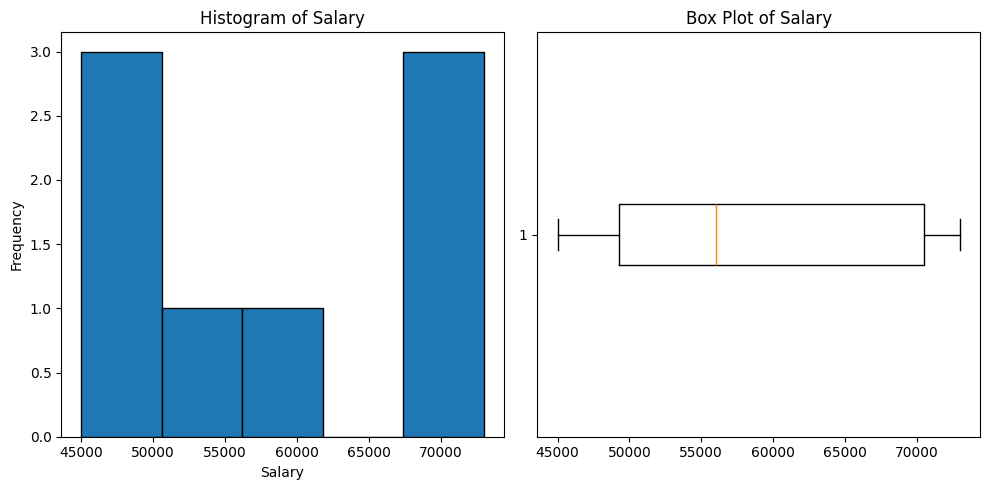

In [23]:
##Histogram and box plot of the data
# Create a figure with two subplots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Histogram of Salary
ax[0].hist(df['Salary'], bins=5, edgecolor='black')
ax[0].set_title('Histogram of Salary')
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Frequency')
# Box plot of Salary
ax[1].boxplot(df['Salary'], vert=False)
ax[1].set_title('Box Plot of Salary')
# Layout so plots do not overlap
fig.tight_layout()
plt.show()
